In [1]:
%matplotlib inline

We have
1. genome-scale metabolic model of E. _coli_ from `cobrapy`
2. "the experimental data" to predict, _roughly_ time series of [metabolite]'s, $\vec{\mathbf{x}}$, in
    - some $x^{(i)}_0$'s in `data/external/growth_medium.xlsx`
    - `data/external/fermentation_data.xlsx`

In [2]:
from pathlib import Path
import pandas as pd

DATA_ROOT = Path(".").resolve().parent / "data"
MEDIUM_TIME_SERIES_PATH = DATA_ROOT / "interim" / "medium_time_series.csv"

# Read the CSV file
df = pd.read_csv(MEDIUM_TIME_SERIES_PATH)
df.columns

# Set the "Compound" column as the index
df.set_index("BiGG ID", inplace=True)

# # Drop the compound rows for which the "Compound" column value contains "?"
# df = df[~df["Compound"].str.contains("\?")]
# Drop the compound rows for which the BiGG ID is missing
df = df[df.index.notna()]

In [3]:
import matplotlib.pyplot as plt

# Drop the columns we don"t need
meta_cols = ["Compound", "# H's", "type", "Peaks", "other corrections", "Unnamed: 6", "Before incoulation"]
time_series = df.iloc[:, 7:].groupby("BiGG ID").sum()

# Transpose the dataframe so that each row becomes a column (time series)
time_series_transposed = time_series.T
time_series_transposed

BiGG ID               Nacasp         ac     cbasp       cit       etoh  \
Before incoulation  0.000000   0.011816  0.028120  0.012679   8.898163   
0                   0.010281   0.109581  0.032462  0.012038  10.710354   
0.5                 0.000000   0.187293  0.064074  0.011153  11.520610   
1                   0.013353   0.468511  0.057611  0.013339  11.968795   
1.5                 0.015185   0.587278  0.062707  0.013736  11.608400   
2                   0.016618   0.872368  0.060698  0.013820  11.027119   
2.5                 0.019060   1.243220  0.059247  0.016337  10.901918   
3                   0.026632   1.892138  0.060170  0.016610  11.325965   
3.5                 0.032174   2.455051  0.065036  0.018886  10.925991   
4                   0.048116   3.354858  0.080842  0.020237  11.273469   
4.5                 0.063153   4.160663  0.118336  0.029182  11.438285   
5                   0.085359   4.984952  0.126393  0.028199  11.375250   
5.5                 0.112051   5.639924  0.157532  0.026755  10.947187   
6                   0.153682   7.060717  0.215895  0.036474  11.609567   
6.5                 0.248107   8.698553  0.289876  0.050330  11.469339   
7                   0.396241  11.148210  0.391711  0.056016  11.887783   
7.5                 0.608973  15.568525  0.626595  0.084910  13.697096   
8                   0.548512  11.493630  0.628818  0.076992   8.679880   
8.5                 0.808677  10.302102  1.226640  0.123793   9.280218   
9                   0.765651   2.100237  1.311780  0.137570  17.705578   
9.5                 0.748947   0.056758  1.289899  0.143943  17.538442   
10                  0.799952   0.037648  1.355517  0.144277  17.441280   
10.5                0.757570   0.034206  1.284943  0.143074  17.055376   
11                  0.706820   0.038401  1.179098  0.127795  15.064233   
11.5                0.783138   0.034070  1.311220  0.141644  16.716502   
12                  0.813431   0.036958  1.375411  0.143473  16.950681   
12.5                0.826428   0.038127  1.397794  0.134004  14.760422   

BiGG ID                  for      glc__D      orot       pyr      succ  \
Before incoulation  0.000000  225.716425  0.000000  0.000000  0.000000   
0                   0.020234  221.453893  0.014686  0.000000  0.000000   
0.5                 0.017863  221.628637  0.018133  0.000000  0.000000   
1                   0.097349  219.469125  0.027876  0.000000  0.000000   
1.5                 0.017026  217.551336  0.032037  0.000000  0.000000   
2                   0.016787  209.568577  0.040328  0.000000  0.000000   
2.5                 0.019052  206.881546  0.051333  0.000000  0.000000   
3                   0.084743  208.691135  0.072621  0.000000  0.000000   
3.5                 0.073919  204.500414  0.096974  0.000000  0.000000   
4                   0.206910  204.552315  0.148756  0.000000  0.014609   
4.5                 0.262254  202.843943  0.207187  0.000000  0.022363   
5                   0.435563  192.284045  0.305086  0.010420  0.039209   
5.5                 0.550397  177.498946  0.398838  0.010990  0.040551   
6                   1.156220  162.471471  0.559308  0.018958  0.145235   
6.5                 1.096535  143.869592  0.802150  0.015676  0.127201   
7                   1.764219  118.045788  1.252152  0.025006  0.217512   
7.5                 4.404469   83.908641  1.705760  0.054413  0.626348   
8                   2.485290   22.923098  1.995313  0.048898  0.350986   
8.5                 0.618097    0.714086  2.499116  0.025885  0.776308   
9                   0.143151    0.653299  2.377328  0.022204  0.161517   
9.5                 0.024320    0.705766  1.930174  0.017506  0.041864   
10                  0.017295    0.555438  1.515549  0.014420  0.044173   
10.5                0.012253    1.525638  1.739597  0.014146  0.044011   
11                  0.013429    1.362242  1.097640  0.012809  0.051429   
11.5                0.014024    0.733029  1.437814  0.014066  0.046741   
12 

In [4]:
import matplotlib.pyplot as plt
import matplotlib.lines
import matplotlib.legend
import pandas as pd

def plot_compound_time_series(time_series_map: dict[str, pd.DataFrame], what_measured: str):
    """
    Plots <= 4 time series for the same set of compounds over the same set of time steps,
    assigning the same colour but different line patterns to compounds across different time series.
    Limits the number of plotted time series to a maximum of 4 for readability.

    Args
    ---
    time_series_map: A dictionary of the time series to plot, the keys being names
        and values the actual underlying data in a DataFrame with index corresponding
        to the domain to plot over and columns the time series. Column names are used
        for labelling the plotted lines in the legend.

    what_measured: Common property measured in all the time series to label the y-axis with.
    """

    if len(time_series_map) > 4:
        raise ValueError("Too many time series to plot. Maximum allowed is 4.")

    # Create the figure and axes object
    fig, ax = plt.subplots(figsize=(15, 10))

    # Define line styles
    line_styles = ('-', '--', '-.', ':')

    series_names, time_series_list = list(zip(*time_series_map.items()))

    # Get a color map for the compounds
    num_compounds = len(time_series_list[0].columns)  # Assuming all DataFrames have the same compounds
    color_map = plt.cm.get_cmap('tab10', num_compounds)  # You can choose a different colormap

    # Plot each time series
    for i_series, time_series in enumerate(time_series_list):
        # Plot each compound
        for i_comp, compound in enumerate(time_series.columns):
            compound_name = time_series[compound].name
            ax.plot(time_series.index, time_series[compound], 
                    label=compound_name if i_series == 0 else None,  # Label only once
                    linestyle=line_styles[i_series], 
                    color=color_map(i_comp))  # Assign color based on compound index

    # Label the line styles with assigned time series in legend
    leg_lines = [matplotlib.lines.Line2D([], [], linestyle=line_styles[i], label=series_names[i], color="black")
                 for i in range(len(series_names))]
    legend = matplotlib.legend.Legend(ax, handles=leg_lines, labels=[h.get_label() for h in leg_lines])
    ax.add_artist(legend)

    # compounds
    ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1)) 

    # Customize the plot
    ax.set_title("Time Series of Compounds")
    ax.set_xlabel("Time Steps")
    ax.set_ylabel(what_measured)
    fig.tight_layout()

    # Show the plot
    plt.show()

/tmp/ipykernel_9461/1302877292.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10', num_compounds)  # You can choose a different colormap


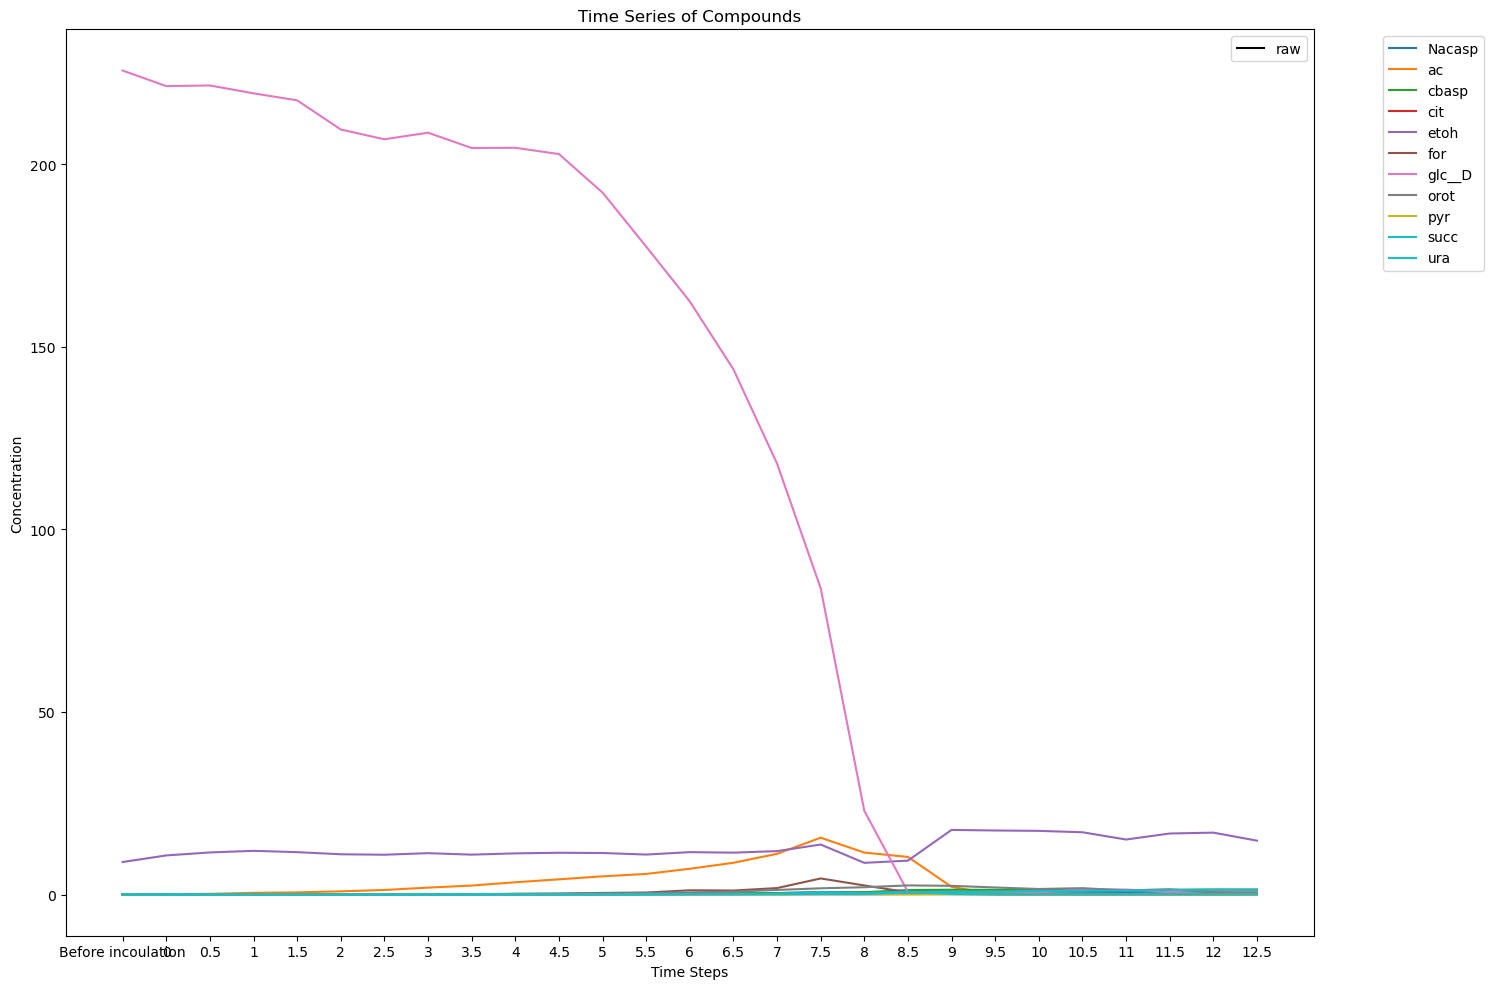

In [5]:
plot_compound_time_series({"raw": time_series_transposed}, "Concentration")

### Connecting `cobra`, experimental data
First, need to map the metabolite names and/or HMDB ID's to `cobra` `id`s and/or names.

In [6]:
import cobra
from cobra.io import load_model

coli_model = load_model("iAF1260")
coli_model

<Model iAF1260 at 0x72f5b0780a10>

In [7]:
cobra_metabol_names = coli_model.metabolites.list_attr("name")
i_uracil = cobra_metabol_names.index("Uracil")
coli_model.metabolites[i_uracil]

<Metabolite ura_c at 0x72f5b0245b90>

In [8]:
coli_model.metabolites[i_uracil].annotation

{'sbo': 'SBO:0000247',
 'bigg.metabolite': 'ura',
 'biocyc': 'META:URACIL',
 'chebi': ['CHEBI:27210',
  'CHEBI:43254',
  'CHEBI:15288',
  'CHEBI:46375',
  'CHEBI:17568',
  'CHEBI:9882'],
 'hmdb': 'HMDB00300',
 'inchi_key': 'ISAKRJDGNUQOIC-UHFFFAOYSA-N',
 'kegg.compound': 'C00106',
 'kegg.drug': ['D00027', 'D09776'],
 'metanetx.chemical': 'MNXM158',
 'reactome.compound': '83962',
 'sabiork': '61',
 'seed.compound': 'cpd00092'}

~~Now we need to find all the metabolites that are in df, in cobra by the common HMDB ID.~~

BiGG IDs = cobra IDs

In [9]:
# # pull out all the cobra HMDB ID's into a searchable container
# coli_bolites = coli_model.metabolites
# all_hmids_cobraIDs_map = {}
# for i in range(len(coli_bolites)):
#     if "hmdb" in coli_bolites[i].annotation:
#         if isinstance(coli_bolites[i].annotation["hmdb"], str):
#             all_hmids_cobraIDs_map[coli_bolites[i].annotation["hmdb"]] = coli_bolites[i].id

#         elif isinstance(coli_bolites[i].annotation["hmdb"], list):
#             for hmid in coli_bolites[i].annotation["hmdb"]:
#                 if isinstance(coli_bolites[i].annotation["hmdb"], str):
#                     all_hmids_cobraIDs_map[coli_bolites[i].annotation["hmdb"]] = coli_bolites[i].id
                            
# all_hmids_cobraIDs_map

In [10]:
# def get_cobraID_by_hmdbID(hmid: str) -> str:
#     if hmid in all_hmids_cobraIDs_map:
#         return all_hmids_cobraIDs_map[hmid]
#     print(f"No corresponding metabolite found in cobra for HMDB ID {hmid}")

# df = df.assign(cobra_id=df.index.map(get_cobraID_by_hmdbID))
# df

***Finally***, we may get to constructing $S$ and $\vec{\mathbf{x}}$.

Luckily, COBRA provides a [convenient function to get the stoichiometric matrix, `create_stoichiometric_matrix`](https://cobrapy.readthedocs.io/en/latest/autoapi/cobra/util/array/index.html#cobra.util.array.create_stoichiometric_matrix).

As for the sample $\frac{\mathrm{d} \vec{\mathbf{x}}} {\mathrm{d}t}$'s at sample $t_i$'s, we'll try first fitting a curve to the time series, then sampling said $t_i$'s and finally approximating said $\frac{\mathrm{d} \vec{\mathbf{x}}(t_i)}{\mathrm{d}t}$'s.

In [11]:
import scipy

S = cobra.util.array.create_stoichiometric_matrix(coli_model, array_type="dok")
print(f"S contains {S.size} non-zero values, whereas it is {S.shape[0]} x {S.shape[1]} = {S.shape[0]*S.shape[1]}")

S contains 9231 non-zero values, whereas it is 1668 x 2382 = 3973176


But first, in order to even fit the curve, we have to form the $\vec{\mathbf{x}}(t_i)$'s. We'll stick each each $\vec{\mathbf{x}}(t_i)$ into a time series data matrix as a column, in order of time.

For compatibility with $S$, each [metabolite] measurement will have to be matched to its index amongst the rows of $S$ when plugging it into the $\vec{\mathbf{x}}(t_i)$'s.

In [12]:
import numpy as np
import pandas as pd

def make_fullDB_time_series_matrix(metabolite_dbIDs: list[str], experiment_metabolites_time_series: pd.DataFrame) -> np.ndarray:
    """
    "Places" metabolites measurements recorded in a DataFrame into vectors multipliable into a full stoichiometric matrix.
    Since the stoichiometric matrix S includes a column for **every** metabolite in the *entire* database that S came from,
    the measurements of metabolites in the experiment must be placed into the right indices in these vectors.
    The vectors for all measuring times are returned together in a matrix where rows are the measurements for each time point
    and columns are metabolites.

    Args:
    metabolite_dbIDs: A list of metabolite IDs in the database order.
    experiment_metabolites_time_series: A Pandas DataFrame with columns as metabolite time series 
                        named by their IDs and indexed by time.

    Returns:
    A NumPy array representing the metabolite matrix.
    """

    num_time_points = len(experiment_metabolites_time_series)  # Get number of time points from DataFrame index
    num_metabolites = len(metabolite_dbIDs)
    metabolite_matrix = np.zeros((num_time_points, num_metabolites))

    found_experiment_metabolites = set()

    for metabolite_index, metabolite_BiGG_id in enumerate(metabolite_dbIDs):
        # print(f"Processing {metabolite_BiGG_id}")

        # if metabolite_BiGG_id[-2:] == "_c" or metabolite_BiGG_id[-2:] == "_e":
        if metabolite_BiGG_id[-2:] == "_c":
            metabolite_id_universal = metabolite_BiGG_id[:-2]

        if metabolite_id_universal in experiment_metabolites_time_series.columns \
           and metabolite_id_universal not in found_experiment_metabolites:

        #     squished_sqrt = np.sqrt( 1/float(experiment_metabolites_time_series.index[-1]) * experiment_metabolites_time_series.index.to_numpy(np.float64) )
        #     # assume takes in every metabolite like sqrt(t), t from inoculation?
        #     if metabolite_BiGG_id[-1] == 'c':
        #         metabolite_series = squished_sqrt * experiment_metabolites_time_series[metabolite_id_universal]
        #     # metabolites taken in out of extracellular space
        #     elif metabolite_BiGG_id[-1] == 'e':
        #         metabolite_series = (1 - squished_sqrt) * experiment_metabolites_time_series[metabolite_id_universal]

            # metabolite_matrix[:, metabolite_index] = metabolite_series
            metabolite_matrix[:, metabolite_index] = experiment_metabolites_time_series[metabolite_id_universal]

            found_experiment_metabolites.add(metabolite_id_universal)

    return metabolite_matrix

In [13]:
coli_bolite_IDs = coli_model.metabolites.list_attr("id")
fullcoli_time_series = make_fullDB_time_series_matrix(coli_bolite_IDs, time_series_transposed.iloc[1:, :])
print(fullcoli_time_series)
print("sum = ", fullcoli_time_series.sum())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
sum =  3517.898217719596


### Time series smoothing
Now that we _have_ $S$ and $\vec{\mathbf{x}}(t_i)$'s, as aforementioned, we'll try first fitting a curve to the time series with a moving average filter, then sampling said $t_i$'s and finally approximating said $\frac{\mathrm{d} \vec{\mathbf{x}}(t_i)}{\mathrm{d}t}$'s.

In [14]:
roll_win = 2
median_smoothed_series = time_series_transposed.rolling(window=roll_win).mean().iloc[roll_win-1:, :]
median_smoothed_series

BiGG ID    Nacasp         ac     cbasp       cit       etoh       for  \
0        0.005141   0.060699  0.030291  0.012359   9.804258  0.010117   
0.5      0.005141   0.148437  0.048268  0.011596  11.115482  0.019049   
1        0.006677   0.327902  0.060843  0.012246  11.744703  0.057606   
1.5      0.014269   0.527895  0.060159  0.013538  11.788598  0.057187   
2        0.015901   0.729823  0.061702  0.013778  11.317759  0.016906   
2.5      0.017839   1.057794  0.059973  0.015079  10.964518  0.017920   
3        0.022846   1.567679  0.059708  0.016474  11.113941  0.051898   
3.5      0.029403   2.173594  0.062603  0.017748  11.125978  0.079331   
4        0.040145   2.904954  0.072939  0.019561  11.099730  0.140414   
4.5      0.055635   3.757760  0.099589  0.024709  11.355877  0.234582   
5        0.074256   4.572807  0.122364  0.028690  11.406767  0.348909   
5.5      0.098705   5.312438  0.141963  0.027477  11.161218  0.492980   
6        0.132866   6.350320  0.186714  0.031614  11.278377  0.853308   
6.5      0.200895   7.879635  0.252886  0.043402  11.539453  1.126378   
7        0.322174   9.923381  0.340794  0.053173  11.678561  1.430377   
7.5      0.502607  13.358367  0.509153  0.070463  12.792440  3.084344   
8        0.578742  13.531077  0.627707  0.080951  11.188488  3.444879   
8.5      0.678594  10.897866  0.927729  0.100393   8.980049  1.551694   
9        0.787164   6.201169  1.269210  0.130682  13.492898  0.380624   
9.5      0.757299   1.078497  1.300840  0.140757  17.622010  0.083735   
10       0.774450   0.047203  1.322708  0.144110  17.489861  0.020807   
10.5     0.778761   0.035927  1.320230  0.143675  17.248328  0.014774   
11       0.732195   0.036303  1.232021  0.135435  16.059804  0.012841   
11.5     0.744979   0.036236  1.245159  0.134719  15.890368  0.013726   
12       0.798284   0.035514  1.343316  0.142558  16.833591  0.013739   
12.5     0.819929   0.037543  1.386603  0.138738  15.855552  0.013966   

BiGG ID      glc__D      orot       pyr      succ       ura  
0        223.585159  0.007343  0.000000  0.000000  0.016734  
0.5      221.541265  0.016410  0.000000  0.000000  0.008991  
1        220.548881  0.023005  0.000000  0.000000  0.000000  
1.5      218.510230  0.029956  0.000000  0.000000  0.000000  
2        213.559956  0.036182  0.000000  0.000000  0.006236  
2.5      208.225061  0.045830  0.000000  0.000000  0.011569  
3        207.786340  0.061977  0.000000  0.000000  0.012200  
3.5      206.595774  0.084797  0.000000  0.000000  0.006867  
4        204.526364  0.122865  0.000000  0.007305  0.005929  
4.5      203.698129  0.177972  0.000000  0.018486  0.012432  
5        197.563994  0.256137  0.005210  0.030786  0.012925  
5.5      184.891496  0.351962  0.010705  0.039880  0.020960  
6        169.985209  0.479073  0.014974  0.092893  0.031806  
6.5      153.170532  0.680729  0.017317  0.136218  0.045316  
7        130.957690  1.027151  0.020341  0.172356  0.069140  
7.5      100.977215  1.478956  0.039709  0.421930  0.107012  
8         53.415870  1.850537  0.051655  0.488667  0.128755  
8.5       11.818592  2.247215  0.037391  0.563647  0.343369  
9          0.683692  2.438222  0.024045  0.468912  0.627276  
9.5        0.679532  2.153751  0.019855  0.101691  0.721288  
10         0.630602  1.722861  0.015963  0.043019  0.844643  
10.5       1.040538  1.627573  0.014283  0.044092  0.981703  
11         1.443940  1.418619  0.013478  0.047720  1.039044  
11.5       1.047635  1.267727  0.013437  0.049085  1.135692  
12         0.906812  1.007179  0.014935  0.049464  1.271404  
12.5       0.928994  0.545297  0.015341  0.051270  1.297430

/tmp/ipykernel_9461/1302877292.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10', num_compounds)  # You can choose a different colormap


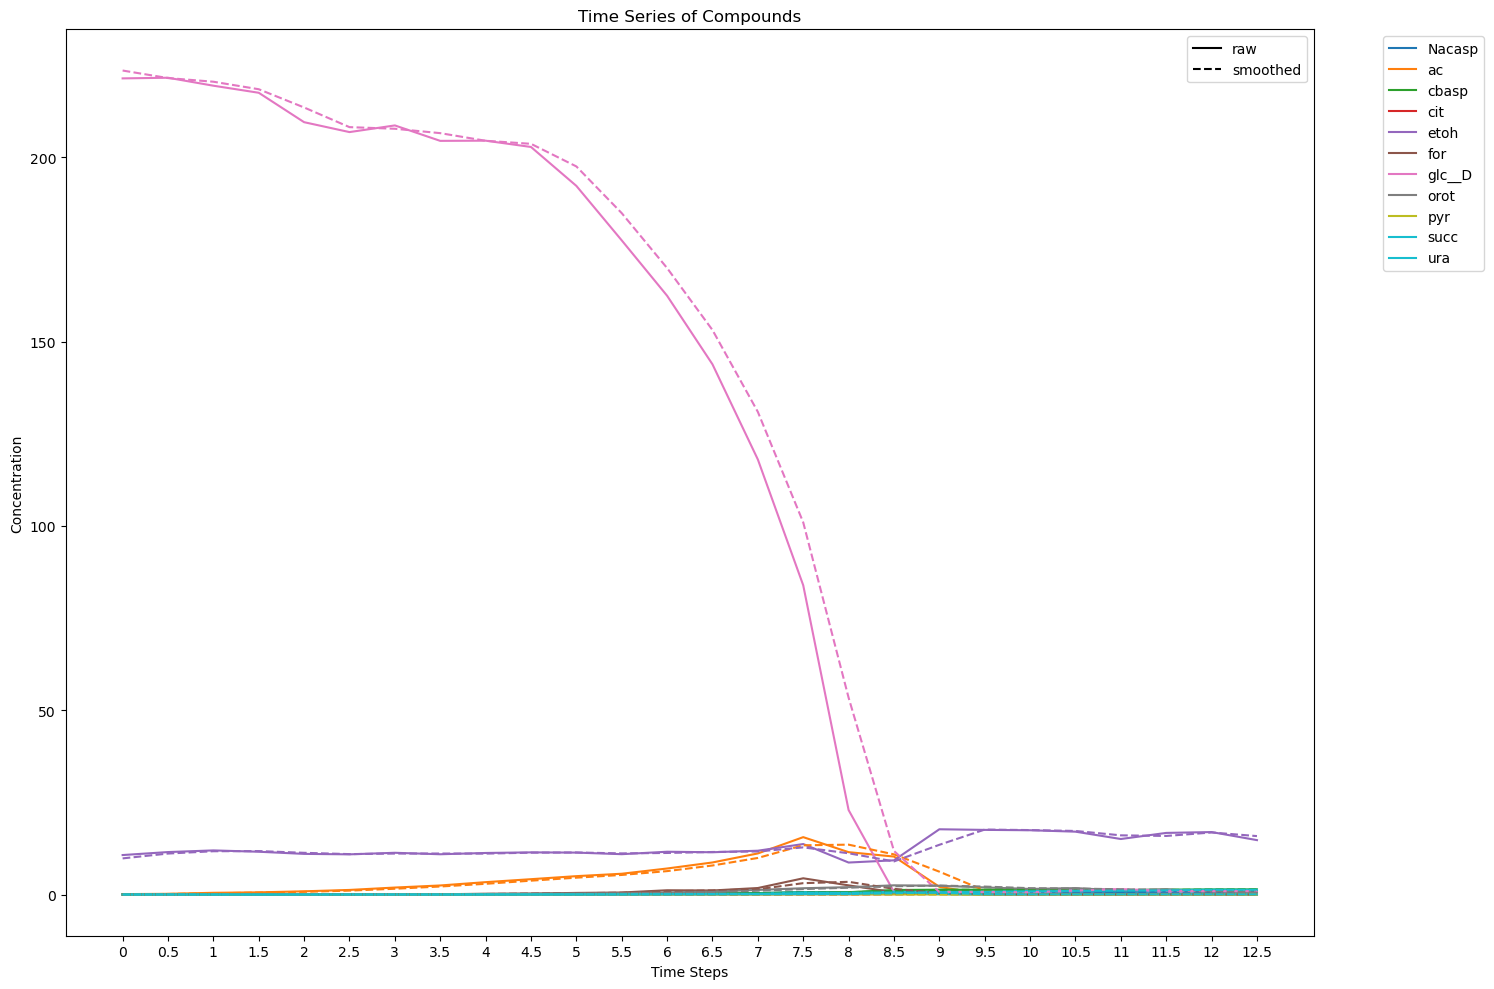

In [15]:
plot_compound_time_series({"raw": time_series_transposed.iloc[roll_win-1:, :],
                           "smoothed": median_smoothed_series}, "Concentration")

In [16]:
N_DERIV_SAMPLES = 0.8 * len(time_series.index)
deriv_sample_spacing = float(time_series_transposed.index[-1]) / N_DERIV_SAMPLES

derivs_np = np.gradient(time_series_transposed.to_numpy(), deriv_sample_spacing, axis=0)
print(derivs_np.shape, "array")
print(derivs_np)

(27, 11) array
[[ 7.23787042e-03  6.88263702e-02  3.05693030e-03 -4.50664363e-04
   1.27578263e+00  1.42449866e-02 -3.00082286e+00  1.03389634e-02
   0.00000000e+00  0.00000000e+00  1.75810694e-03]
 [ 0.00000000e+00  6.17677582e-02  1.26558960e-02 -5.36986712e-04
   9.23101319e-01  6.28768413e-03 -1.43890145e+00  6.38290893e-03
   0.00000000e+00  0.00000000e+00 -5.45076227e-03]
 [ 1.08149037e-03  1.26343454e-01  8.85252269e-03  4.57752639e-04
   4.42971363e-01  2.71441957e-02 -6.98638374e-01  4.64294369e-03
   0.00000000e+00  0.00000000e+00 -6.32981575e-03]
 [ 5.34498926e-03  1.40794914e-01 -4.81160793e-04  9.09350879e-04
   3.09021305e-02 -2.94569182e-04 -1.43521017e+00  4.89401871e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.14921428e-03  1.42157455e-01  1.08654249e-03  1.69445024e-04
  -3.31470066e-01 -2.83576688e-02 -3.48499281e+00  4.38286670e-03
   0.00000000e+00  0.00000000e+00  4.39026117e-03]
 [ 1.36397018e-03  2.30891554e-01 -1.21786697e-03  9.15329220e-04
  -2

In [17]:
# N_deriv_sample_points evenly spaced throughout a range of [0, t_last_point]
derivs_times = float(time_series_transposed.index[-1]) / derivs_np.shape[0] * np.arange(derivs_np.shape[0])

derivs = pd.DataFrame(derivs_np, index=pd.Series(derivs_times), columns=time_series.index)
# print(derivs)
derivs
# derivs.describe()

BiGG ID      Nacasp        ac     cbasp       cit      etoh       for  \
0.000000   0.007238  0.068826  0.003057 -0.000451  1.275783  0.014245   
0.462963   0.000000  0.061768  0.012656 -0.000537  0.923101  0.006288   
0.925926   0.001081  0.126343  0.008853  0.000458  0.442971  0.027144   
1.388889   0.005345  0.140795 -0.000481  0.000909  0.030902 -0.000295   
1.851852   0.001149  0.142157  0.001087  0.000169 -0.331470 -0.028358   
2.314815   0.001364  0.230892 -0.001218  0.000915 -0.248682  0.000713   
2.777778   0.003525  0.358959 -0.000186  0.000982  0.105194  0.023921   
3.240741   0.004616  0.426564  0.002038  0.000897  0.008474  0.019313   
3.703704   0.007562  0.514877  0.007277  0.001276 -0.018479  0.043003   
4.166667   0.010904  0.600376  0.018762  0.003624  0.180327  0.066294   
4.629630   0.013109  0.573793  0.016034  0.002803  0.035827  0.080486   
5.092593   0.017212  0.520700  0.013797 -0.000854 -0.172867  0.101426   
5.555556   0.024050  0.730669  0.031505  0.002913  0.082480  0.253672   
6.018519   0.047892  1.076637  0.046585  0.008298  0.183798  0.192241   
6.481481   0.085381  1.438798  0.061887  0.006879  0.097932  0.214015   
6.944444   0.127025  2.418230  0.118525  0.012172  0.784171  1.164393   
7.407407   0.053599  0.121588  0.083462  0.007384 -1.129182  0.253817   
7.870370   0.070296 -1.853781  0.211216  0.013687 -1.554741 -1.332803   
8.333333   0.076433 -3.306474  0.240403  0.021323  3.177046 -0.824433   
8.796296  -0.021025 -3.606361  0.022267  0.007093  2.906895 -0.209010   
9.259259   0.012074 -0.726031  0.015395  0.002361 -0.093033 -0.044301   
9.722222   0.003035 -0.007939 -0.001745 -0.000306 -0.170040 -0.004248   
10.185185 -0.032783  0.000265 -0.062099 -0.005802 -0.836720 -0.001361   
10.648148  0.009000 -0.000048  0.009250 -0.000503 -0.119284  0.000624   
11.111111  0.037527 -0.000508  0.069102  0.005519  0.664030  0.000009   
11.574074  0.015238  0.001428  0.030474 -0.002689 -0.688540  0.000160   
12.037037  0.009150  0.000823  0.015757 -0.006667 -1.541943  0.000722   

BiGG ID       glc__D      orot       pyr      succ       ura  
0.000000   -3.000823  0.010339  0.000000  0.000000  0.001758  
0.462963   -1.438901  0.006383  0.000000  0.000000 -0.005451  
0.925926   -0.698638  0.004643  0.000000  0.000000 -0.006330  
1.388889   -1.435210  0.004894  0.000000  0.000000  0.000000  
1.851852   -3.484993  0.004383  0.000000  0.000000  0.004390  
2.314815   -3.755766  0.006792  0.000000  0.000000  0.003754  
2.777778   -0.308860  0.011367  0.000000  0.000000  0.000444  
3.240741   -0.838159  0.016065  0.000000  0.000000 -0.003754  
3.703704   -1.456865  0.026800  0.000000  0.005142 -0.000660  
4.166667   -0.583078  0.038795  0.000000  0.007872  0.004578  
4.629630   -4.318431  0.055028  0.003668  0.008659  0.000347  
5.092593   -8.921439  0.067461  0.003868  0.006402  0.005656  
5.555556  -10.494026  0.089486  0.003005  0.037321  0.007636  
6.018519  -11.837533  0.141966  0.001650  0.030501  0.009511  
6.481481  -15.637841  0.243881  0.002129  0.025441  0.016772  
6.944444  -21.106255  0.318071  0.013635  0.175700  0.026662  
7.407407  -33.483187  0.261593  0.008410  0.046983  0.015307  
7.870370  -29.284484  0.279261 -0.010042  0.052786  0.151088  
8.333333   -7.838969  0.134469 -0.009396 -0.066693  0.199871  
8.796296   -0.002929 -0.200268 -0.002949 -0.258524  0.066184  
9.259259   -0.034447 -0.303346 -0.002740 -0.041305  0.086842  
9.722222    0.288595 -0.067083 -0.001183  0.000756  0.096491  
10.185185   0.283995 -0.147104 -0.000567  0.002554  0.040368  
10.648148  -0.278998 -0.106228 -0.000028  0.000961  0.068040  
11.111111  -0.099140 -0.183426  0.001055  0.000267  0.095542  
11.574074   0.015616 -0.325165  0.000286  0.001271  0.018322  
12.037037  -0.213454 -0.043996 -0.000653 -0.001292 -0.040653

/tmp/ipykernel_9461/1302877292.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10', num_compounds)  # You can choose a different colormap


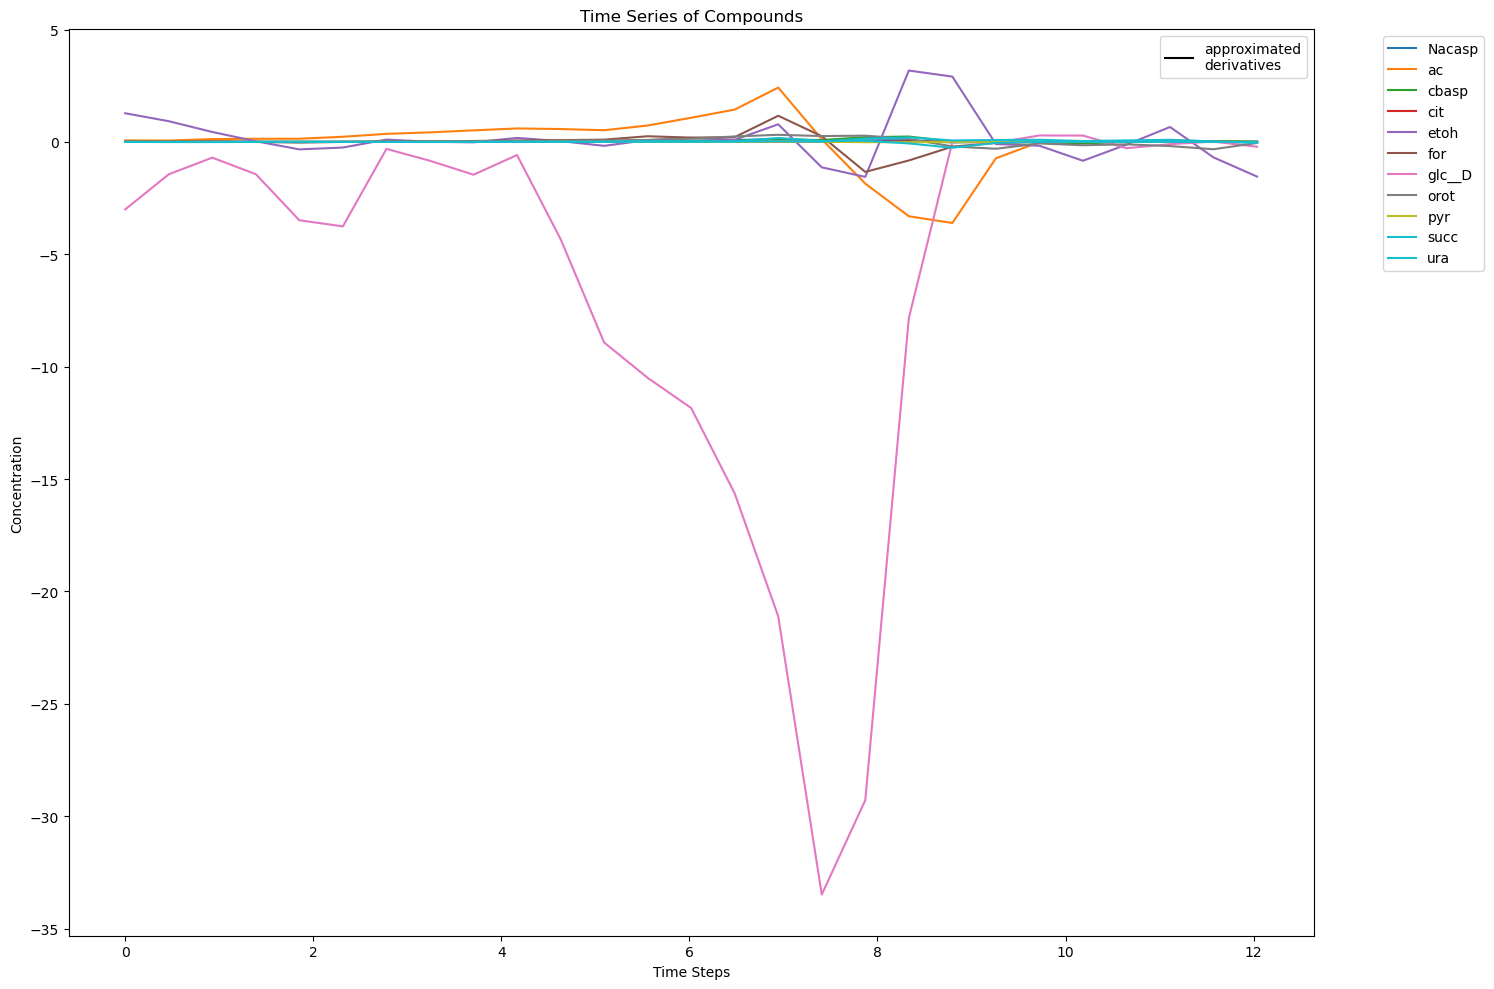

In [18]:
# plot_compound_time_series({"raw": time_series_transposed.iloc[roll_win-1:, :],
#                            "smoothed": median_smoothed_series,
#                            "approximated\nderivatives": derivs}, "Concentration")
plot_compound_time_series({"approximated\nderivatives": derivs}, "Concentration")

# Retrofit FBA -> Dynamics Plan
First we approximate the initial fluxes $\vec{\mathbf{v}}_0 = \vec{\mathbf{v}}(0)$ by least squares on $S\vec{\mathbf{v}} = \frac{\mathrm{d} \vec{\mathbf{x}}} {\mathrm{d}t}$. That is, have Scipy find a $\vec{\mathbf{v}}_0 = \arg\min_{\vec{\mathbf{v}}} ||\frac{\mathrm{d} \vec{\mathbf{x}}} {\mathrm{d}t} - \vec{\mathbf{v}}||_2^2$.

In [19]:
fullcoli_derivs = make_fullDB_time_series_matrix(coli_bolite_IDs, derivs)
print(fullcoli_derivs)
print("shape =", fullcoli_derivs.shape, "sum =", fullcoli_derivs.sum())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape = (27, 1668) sum = -153.59100254444365


In [20]:
init_derivs = fullcoli_derivs[1,:]
print(S.shape, " x ", init_derivs.shape)
scipy.sparse.linalg.lsqr(S, init_derivs)

(1668, 2382)  x  (1668,)


(array([ 2.83596336e-03, -2.96427502e-03, -6.03355128e-03, ...,
         9.84866078e-03, -9.70118931e-05, -1.72366435e-03]),
 1,
 323,
 0.0009796492841545037,
 0.0009796492841545037,
 991.4430134808791,
 14376.039358602184,
 np.float64(0.00046199355006668595),
 0.993804486211389,
 array([0., 0., 0., ..., 0., 0., 0.]))

And in fact, let's actually just try this out for $t$ through the whole experiment and see what evolution of fluxes FBA predicts from experimental metabolite concentrations.

In [21]:
fullcoli_flux_series = np.row_stack([scipy.sparse.linalg.lsqr(S, fullcoli_derivs[i,:])[0]
                            for i in range(fullcoli_derivs.shape[0])])

/tmp/ipykernel_9461/1117945603.py:1: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  fullcoli_flux_series = np.row_stack([scipy.sparse.linalg.lsqr(S, fullcoli_derivs[i,:])[0]


In [22]:
# credit https://stackoverflow.com/a/54614291
flux_series = pd.DataFrame(fullcoli_flux_series, index=time_series_transposed.index, columns=coli_model.reactions.list_attr("id"))
flux_series = flux_series.loc[:, (fullcoli_flux_series != 0).any(axis=0)]
flux_series

ACGAM1PPpp  2AGPA140tipp  EX_acser_e  2AGPA141tipp  \
Before incoulation    0.004564     -0.004887   -0.004146     -0.004369   
0                     0.002836     -0.002964   -0.006034     -0.002635   
0.5                   0.002298     -0.001581   -0.005838     -0.001391   
1                     0.002817     -0.001280    0.000354     -0.001092   
1.5                   0.004475     -0.001968    0.011085     -0.001692   
2                     0.005587     -0.002494    0.008549     -0.002139   
2.5                   0.004065     -0.000923   -0.011102     -0.000737   
3                     0.005034     -0.001199   -0.010356     -0.000971   
3.5                   0.006296     -0.001792   -0.010554     -0.001477   
4                     0.006668     -0.001764   -0.018318     -0.001435   
4.5                   0.009386     -0.004220   -0.002834     -0.003608   
5                     0.012972     -0.007089    0.017205     -0.006144   
5.5                   0.015882     -0.009427    0.014329     -0.008184   
6                     0.021043     -0.011085    0.006820     -0.009578   
6.5                   0.028239     -0.014390    0.009529     -0.012422   
7                     0.038149     -0.023122   -0.004428     -0.020087   
7.5                   0.030416     -0.023153    0.125479     -0.020546   
8                     0.014653     -0.014467    0.169553     -0.013207   
8.5                  -0.018510     -0.007790    0.094204     -0.007890   
9                    -0.031753     -0.000625    0.082321     -0.001223   
9.5                  -0.007682      0.001715    0.024557      0.001397   
10                   -0.000364      0.000624    0.001106      0.000571   
10.5                 -0.001690      0.002250    0.008049      0.002114   
11                   -0.000059      0.000166    0.002618      0.000174   
11.5                  0.000788     -0.001307   -0.005632     -0.001113   
12                   -0.001841      0.001937    0.008393      0.001853   
12.5                 -0.002770      0.003000    0.016769      0.002696   

                    2AGPA160tipp   3OAR180  2AGPA161tipp   3OAR181  \
Before incoulation     -0.004713 -0.002844     -0.005048 -0.003116   
0                      -0.002817 -0.002152     -0.003084 -0.002721   
0.5                    -0.001491 -0.001223     -0.001591 -0.001516   
1                      -0.001243 -0.000260     -0.001193  0.000075   
1.5                    -0.001988  0.000712     -0.001797  0.001895   
2                      -0.002476  0.000347     -0.002273  0.001523   
2.5                    -0.000826 -0.000944     -0.000771 -0.001043   
3                      -0.001101 -0.000857     -0.000994 -0.000737   
3.5                    -0.001667 -0.000986     -0.001492 -0.000672   
4                      -0.001589 -0.001664     -0.001432 -0.001789   
4.5                    -0.004054 -0.001101     -0.003777 -0.000008   
5                      -0.006969 -0.000169     -0.006520  0.002386   
5.5                    -0.009181 -0.001265     -0.008597  0.001533   
6                      -0.010748 -0.002142     -0.010113  0.000904   
6.5                    -0.013969 -0.002475     -0.013094  0.001689   
7                      -0.022162 -0.006569     -0.020410 -0.001416   
7.5                    -0.023314  0.004513     -0.021794  0.014794   
8                      -0.015555  0.010460     -0.015115  0.019841   
8.5                    -0.008328  0.000382     -0.009976  0.001048   
9                      -0.001070  0.001260     -0.002899 -0.000337   
9.5                     0.001529  0.001565      0.001234  0.001689   
10                      0.000608  0.000337      0.000635  0.000394   
10.5                    0.002123  0.002095      0.002317  0.002675   
11                      0.000167  0.000166      0.000177  0.000297   
11.5                   -0.001206 -0.001751     -0.001389 -0.002350   
12                      0.001855  0.001406      0.002016  0.001850   
12.5                    0.002817  0.003312      0.003325 

In [23]:
plot_compound_time_series({"predicted\nfluxes": flux_series}, "Flux")

/tmp/ipykernel_9461/1302877292.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10', num_compounds)  # You can choose a different colormap
/tmp/ipykernel_9461/1302877292.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


Well, that wasn't very helpful.

Let's visualize the metabolism as what it actually is, a **network**. Over time. \
_Credit @sadhen_: https://stackoverflow.com/a/13891839

### Analyses built into COBRA
COBRA includes its own one-line analyses.

<Axes: xlabel='EX_glc__D_e'>

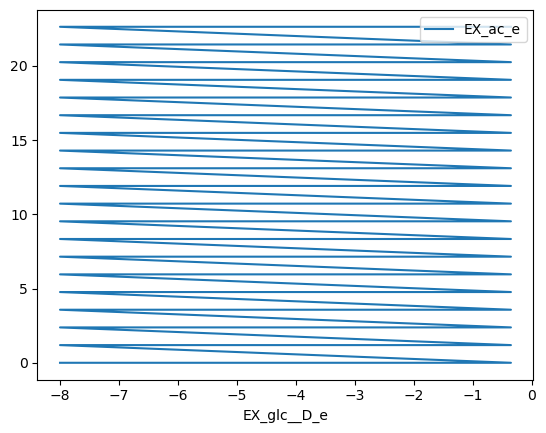

In [24]:
from cobra.flux_analysis import production_envelope

prod_env = production_envelope(coli_model, ["EX_ac_e", "EX_glc__D_e"])
prod_env.plot(x="EX_glc__D_e", y="EX_ac_e")

Now with this initial flux, we just pile up those $\mathrm{d} \vec{\mathbf{x}}$'s to infer all (actually a sample of) the $\vec{\mathbf{x}}(t)$'s. In other symbols, we just